<a href="https://colab.research.google.com/github/zmy2338/Machine-Learning-AWS/blob/main/Copy_of_TRAIN_AWS_Part_II_Day_4_Lab_Notebook_%5BSOLUTIONS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Training and Improving Deep Learning Models**
---

### **Description**
In today's lab you'll learn how to train a neural network and you'll experiment with different parameters for fine-tuning deep learning models. Hyperparameters are the parameters that define the architecture and learning process of a neural network, such as the number of layers, the number of neurons in each layer, the activation function used, and the learning rate used by the optimization algorithm. By experimenting with different hyperparameters, we can optimize the performance of the neural network and achieve better results. This will cover key topics such as:

  * Training neural networks
  * Hyperparameter tuning

<br>

### **Lab Structure**
* **Part 1**: [Review](#p1)

* **Part 2**: [The MNIST Dataset](#p2)

* **Part 3**: [Independent Practice with MNIST](#p3)

* **Part 4**: [Hyperparameter Tuning](#p4)

* **Part 5**: [[ADDITIONAL PRACTICE] Hyperparameter Tuning](#p5)




<br>

### **Goals**
By the end of this lab, you will:
* Train and evaluate a Neural Network for image classification.
* Learn to do hyperparameter tuning of learning rate, activation functions, and model architecture (layers and neurons).
<br>


### **Cheat Sheets**:
[Deep Learning with pytorch](https://docs.google.com/document/d/1yCDNlluOSp3HId_WUXQqi8AH0hCMOgZbDKzvCrRfrY8/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [ ]:
!pip install torchview
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from fastai.vision.all import *
from torchview import draw_graph

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<a name="p1"></a>

---
## **Part #1: Review**
---

#### **Problem #1.1:**

Create and visualize a new model with three hidden layers.

* The input layer should have `10` neurons

* The first hidden layer should have `6` neurons with no activation.

* The second hidden layer should have `4` neurons with ReLU activation function.

* The third hidden layer should have `12` neurons with ReLU activation.

* The output layer should have `4` neurons.

###### **Solution**

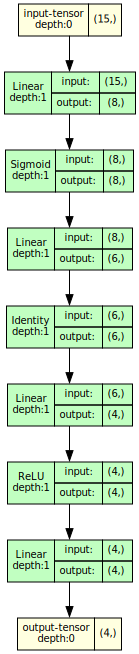

In [ ]:
model = nn.Sequential(
    nn.Linear(10, 6),
    nn.Identity(),
    nn.Linear(6, 4),
    nn.Relu(),
    nn.Linear(4, 12),
    nn.Relu(),
    nn.Linear(12, 4)
)

# Visualizing the network
model_graph = draw_graph(model, input_size=(10,))
model_graph.visual_graph

#### **Problem #1.2:**

Create and visualize a new model with three hidden layers.

* The input layer should have `8` neurons

* The first hidden layer should have `5` neurons with Sigmoid activation.

* The second hidden layer should have `8` neurons with ReLU activation function.

* The third hidden layer should have `7` neurons with no activation.

* The output layer should have `2` neurons.

###### **Solution**

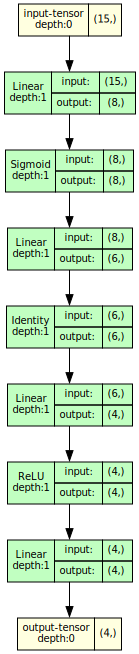

In [ ]:
model = nn.Sequential(
    nn.Linear(8, 5),
    nn.Sigmoid(),
    nn.Linear(5, 8),
    nn.ReLU(),
    nn.Linear(8, 7),
    nn.Identity(),
    nn.Linear(7, 2)
)

# Visualizing the network
model_graph = draw_graph(model, input_size=(8,))
model_graph.visual_graph

---

<center>

#### **Wait for Your Instructor to Continue**

---

<a name="p2"></a>

---
## **Part #2: The MNIST Dataset**
---
In this first part, we'll build a deep neural network using the 8 steps you've seen so far on the MNIST datasets.
*In this practice together, we will create a neural net that can classify the handwritten digits from this data set.*
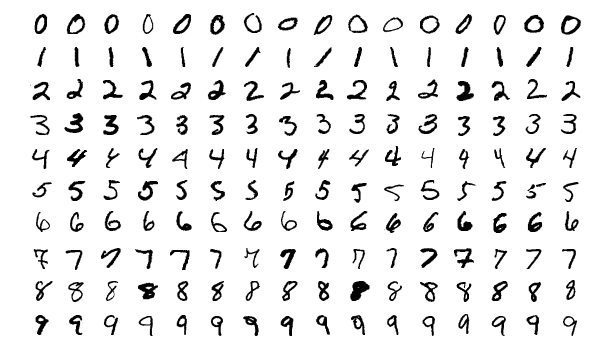





#### **Step #1: Import and and split the data into training/testing**


**This is completed for you. Just run the code below!**

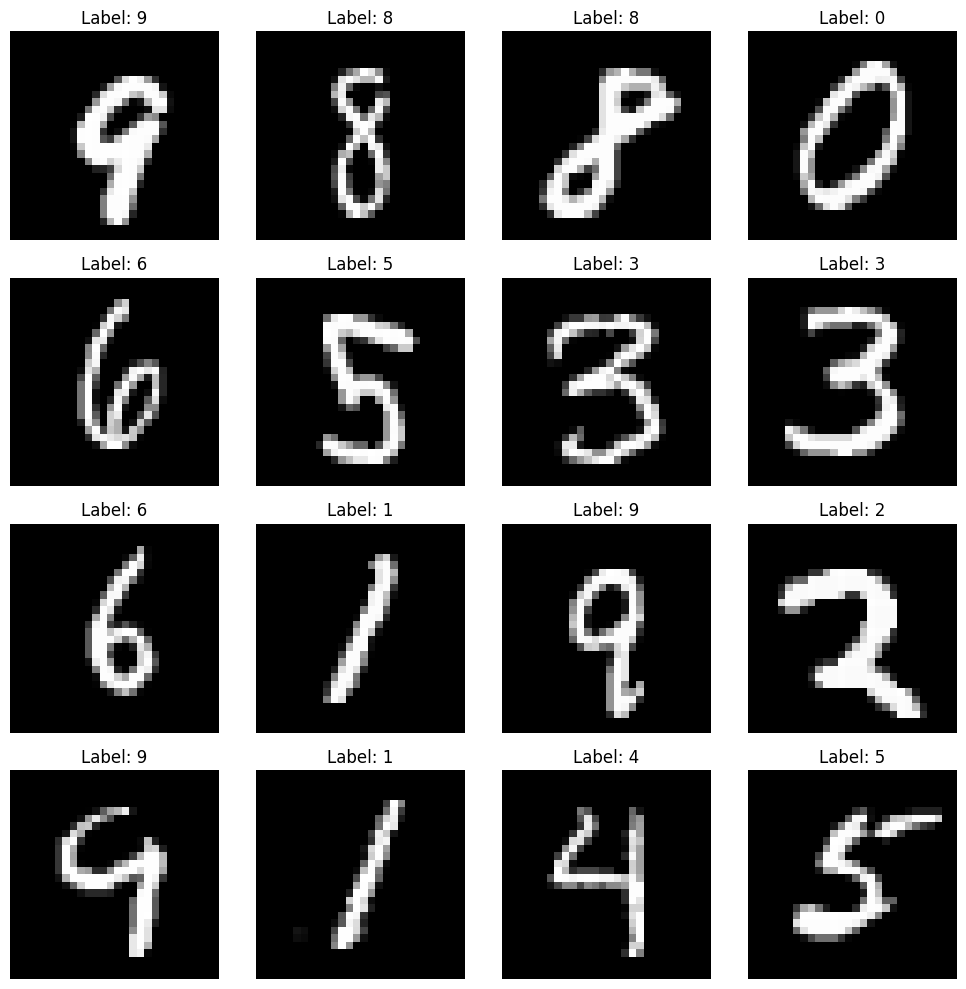

In [ ]:
# Define the transformations
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST dataset
train_dataset = MNIST(root='./data',
                      train=True,
                      download=True,
                      transform=transform)
valid_dataset = MNIST(root='./data',
                      train=False,
                      download=True,
                      transform=transform)

# Create the DataLoaders object
train_dl = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_dl = DataLoader(valid_dataset, batch_size=64, shuffle=True)
dls = DataLoaders(train_dl, valid_dl)

# Set the number of images per row and column in the grid
n_row = 4
n_col = 4

# Get a batch of training data
images, labels = next(iter(train_dl))

# Create a grid of images and labels
fig, axs = plt.subplots(n_row, n_col, figsize=(9, 9))
for i in range(n_row):
    for j in range(n_col):
        ax = axs[i, j]
        img_idx = i * n_col + j
        img = images[img_idx].reshape(28, 28).numpy()  # Reshape the image to 28x28
        label = labels[img_idx].item()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')

plt.tight_layout()
plt.show()

### **Step #2: Determine the dimension of the data**

In this step, you need to determine if the data needs to be flattened. **Determine the dimension of the data with by inspecting one of the `images`.**

Based on the output that you see, for more than two dimensions the data need to be flattened during step #3 (i.e. if your output is `torch.Size([1, 8])` it doesn't need to be flattened, however, if it's `torch.Size([1, 8, 10])` it would need to be flattened).

##### **Solution**

In [ ]:
images[0].shape

torch.Size([1, 28, 28])

### **Step #3-6: Building the model**


Remember to include the `nn.Flatten()` layer at the beginning. After the input layer, you will add a hidden layer with 128 neurons, then another hidden layer with 64 neurons, followed by an output layer with 10 neurons (for the 10 digits). Both hidden layers will have ReLU activation.

In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    # ADD YOUR LAYERS HERE
)

##### **Solution**

In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

---

<center>

#### **Wait for Your Instructor to Continue**

---

### **Step #7: Fit the model**

Use the following parameters:

* `nn.CrossEntropyLoss()` loss function
* accuracy metric
* 10 epochs
* 0.001 learning rate

*Most of the code is given to you.*

In [ ]:
# Define the loss function
loss_func = # WRITE YOUR CODE HERE

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=# WRITE YOUR CODE HERE)

# Train the model
learn.fit(# WRITE YOUR CODE HERE)

# Plot the training and validation losses
learn.recorder.plot_loss()

##### **Solution**

epoch,train_loss,valid_loss,accuracy,time
0,0.142989,0.137637,0.954000,00:22
1,0.099208,0.097155,0.969000,00:22
2,0.069740,0.086019,0.973300,00:22
3,0.061245,0.082529,0.975700,00:22
4,0.054054,0.076212,0.978500,00:24
5,0.049807,0.091361,0.973200,00:23
6,0.033714,0.082554,0.977500,00:27
7,0.030769,0.083302,0.978600,00:24
8,0.028547,0.078849,0.980500,00:23
9,0.023519,0.098345,0.978000,00:22


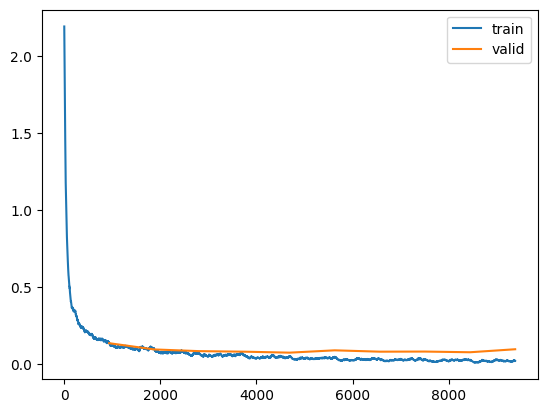

In [ ]:
# Define the loss function
loss_func = nn.CrossEntropyLoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=accuracy)

# Train the model
learn.fit(10, lr=0.001)

# Plot the training and validation losses
learn.recorder.plot_loss()

#### **Step #8: Evaluate the model**
---

We can use the `learn.validate` to get the accuracy for the training and validation datasets.

**Complete the code below to print the accuracy for the training and validation datasets.**

In [ ]:
# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=#FILL IN CODE HERE)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=#FILL IN CODE HERE)
print(f"Validation accuracy: {valid_accuracy:.4f}")

Training accuracy: 0.9931


Validation accuracy: 0.9780


###### **Solution**

In [ ]:
# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=train_dl)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=valid_dl)
print(f"Validation accuracy: {valid_accuracy:.4f}")

###### *Aside:* This way of printing in Python may be new to you. Here's a quick tutorial.

 `train_accuracy` is a variable containing the training accuracy value (a float). The expression inside the curly braces `{train_accuracy:.4f}` formats the value of train_accuracy as a floating-point number with 4 decimal places.

Here's a breakdown of the formatting:

* `train_accuracy` - The variable containing the float value.
* `:` - This is used to introduce the format specification.
* `.4f` - This is the format specification, where:
> * `.` - Indicates that the number should be formatted as a floating-point number.
> * `4` - The number of digits after the decimal point.
> * `f` - A specifier that denotes the type (float).


Here's a simple example to demonstrate the concept:



 ```
a = 3.1415926535
b = 1.6180339887
print(f"The value of a is approximately {a:.2f}")
print(f"The value of b is approximately {b:.3f}")
```

Output:

 ```
The value of a is approximately 3.14
The value of b is approximately 1.618
```


###### Next, we'll plot the confusion matrix.

**This code is provided for you. Run the cell below.**

In [ ]:
# Get predictions and true labels
preds, targs = learn.get_preds()

# Convert predictions to class labels
pred_labels = torch.argmax(preds, dim=1)

# Calculate the confusion matrix
cm = confusion_matrix(targs, pred_labels)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.show()

#### **Step #9: Visualize the model's predictions**
---

Now, run the code below to make predictions with the model and output its predictions for digits in the test set.

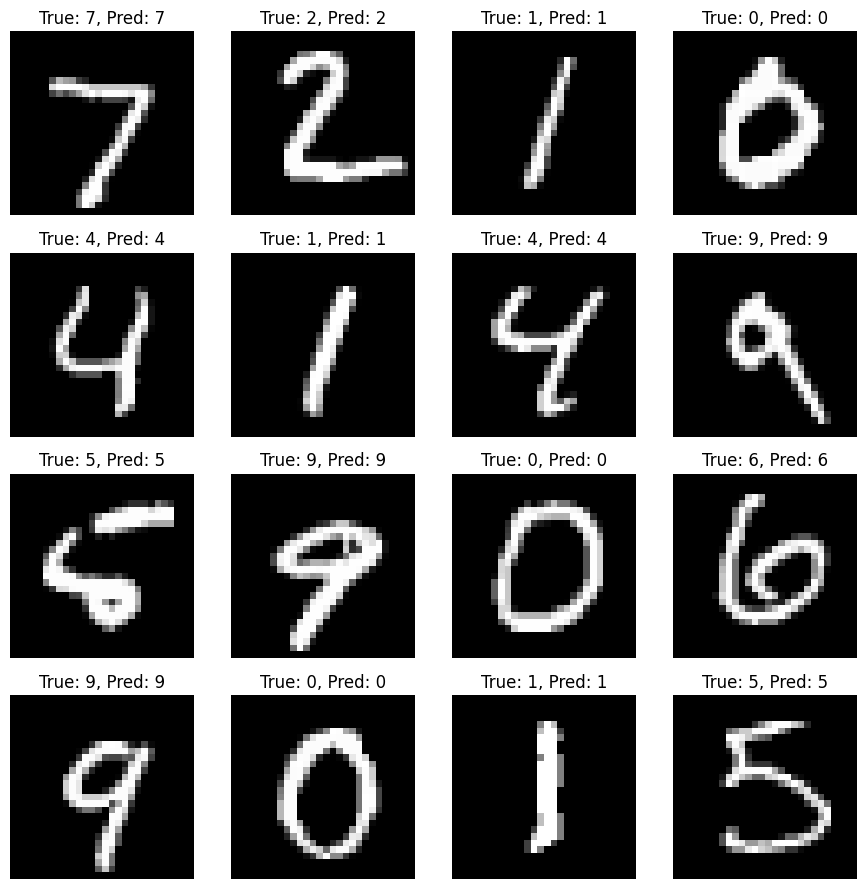

In [ ]:
# Set the number of images per row and column in the grid
n_row = 4
n_col = 4

# Get a batch of validation data
images, labels = next(iter(valid_dl))

# Get model predictions
with torch.no_grad():
    outputs = model(images)
_, preds = torch.max(outputs, 1)

# Create a grid of images, true labels, and predicted labels
fig, axs = plt.subplots(n_row, n_col, figsize=(9, 9))
for i in range(n_row):
    for j in range(n_col):
        ax = axs[i, j]
        img_idx = i * n_col + j
        img = images[img_idx].reshape(28, 28).numpy()  # Reshape the image to 28x28
        true_label = labels[img_idx].item()
        pred_label = preds[img_idx].item()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"True: {true_label}, Pred: {pred_label}")
        ax.axis('off')

plt.tight_layout()
plt.show()


---

<center>

#### **Wait for Your Instructor to Continue**

---

<a name="p3"></a>

---
## **Part #3: Independent Practice with MNIST**
---
In this part, we'll build another deep neural network using the 8 steps you've seen so far on the same MNIST dataset.


#### **Step #1: Import and and split the data into training/testing**


**This step was completed in Part 2**

### **Step #2: Determine the dimension of the data**

**This step was completed in Part 2**

##### **Solution**

In [ ]:
images[0].shape

torch.Size([1, 28, 28])

### **Step #3-6: Building the model**


Remember to include the `nn.Flatten()` layer at the beginning. After the input layer, you will add a hidden layer with 256 neurons, then another hidden layer with 128 neurons, followed by an output layer with 10 neurons (for the 10 digits). The first hidden layer will have Sigmoid activation, and the second hidden layer will have Tanh activation.

In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    # ADD YOUR LAYERS HERE
)

##### **Solution**

In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 256),
    nn.Sigmoid(),
    nn.Linear(256,128),
    nn.Tanh(),
    nn.Linear(128, 10)
)

### **Step #7: Fit the model**

Use the following parameters:

* `nn.CrossEntropyLoss()` loss function
* accuracy metric
* 5 epochs
* 0.01 learning rate

*Most of the code is given to you.*

In [ ]:
# Define the loss function
loss_func = # WRITE YOUR CODE HERE

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=# WRITE YOUR CODE HERE)

# Train the model
learn.fit(# WRITE YOUR CODE HERE)

# Plot the training and validation losses
learn.recorder.plot_loss()

##### **Solution**

epoch,train_loss,valid_loss,accuracy,time
0,0.142989,0.137637,0.954000,00:22
1,0.099208,0.097155,0.969000,00:22
2,0.069740,0.086019,0.973300,00:22
3,0.061245,0.082529,0.975700,00:22
4,0.054054,0.076212,0.978500,00:24
5,0.049807,0.091361,0.973200,00:23
6,0.033714,0.082554,0.977500,00:27
7,0.030769,0.083302,0.978600,00:24
8,0.028547,0.078849,0.980500,00:23
9,0.023519,0.098345,0.978000,00:22


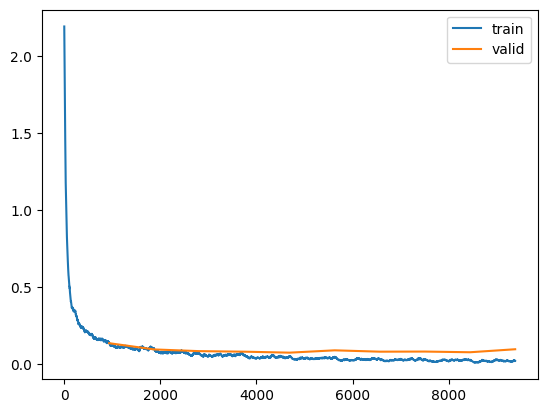

In [ ]:
# Define the loss function
loss_func = nn.CrossEntropyLoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=accuracy)

# Train the model
learn.fit(5, lr=0.01)

# Plot the training and validation losses
learn.recorder.plot_loss()

#### **Step #8: Evaluate the model**


We can use the `learn.validate` to get the accuracy for the training and validation datasets.

**Complete the code below to print the accuracy for the training and validation datasets.**

In [ ]:
# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=#FILL IN CODE HERE)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=#FILL IN CODE HERE)
print(f"Validation accuracy: {valid_accuracy:.4f}")

Training accuracy: 0.9931


Validation accuracy: 0.9780


###### **Solution**

In [ ]:
# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=train_dl)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=valid_dl)
print(f"Validation accuracy: {valid_accuracy:.4f}")

###### Next, we'll plot the confusion matrix.

**This code is provided for you. Run the cell below.**

In [ ]:
# Get predictions and true labels
preds, targs = learn.get_preds()

# Convert predictions to class labels
pred_labels = torch.argmax(preds, dim=1)

# Calculate the confusion matrix
cm = confusion_matrix(targs, pred_labels)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.show()

#### **Step #9: Visualize the model's predictions**


Now, run the code below to make predictions with the model and output its predictions for digits in the test set.

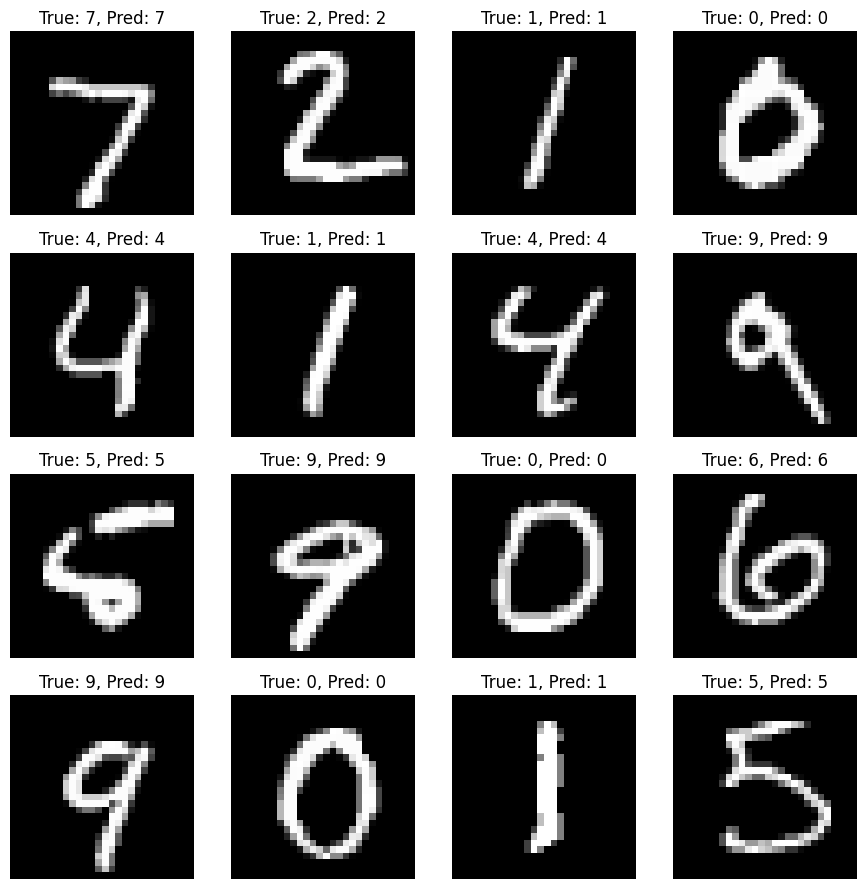

In [ ]:
# Set the number of images per row and column in the grid
n_row = 4
n_col = 4

# Get a batch of validation data
images, labels = next(iter(valid_dl))

# Get model predictions
with torch.no_grad():
    outputs = model(images)
_, preds = torch.max(outputs, 1)

# Create a grid of images, true labels, and predicted labels
fig, axs = plt.subplots(n_row, n_col, figsize=(9, 9))
for i in range(n_row):
    for j in range(n_col):
        ax = axs[i, j]
        img_idx = i * n_col + j
        img = images[img_idx].reshape(28, 28).numpy()  # Reshape the image to 28x28
        true_label = labels[img_idx].item()
        pred_label = preds[img_idx].item()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"True: {true_label}, Pred: {pred_label}")
        ax.axis('off')

plt.tight_layout()
plt.show()


---

<center>

#### **Wait for Your Instructor to Continue**

---

<a name="p4"></a>

---
## **Part #4: Hyperparameter Tuning**
---

#### **Problem #4.1: Change Learning Rate**


Change the learning rate to a few different values and record the accuracy. What do you notice?

In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

# Define the loss function
loss_func = nn.CrossEntropyLoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=accuracy)

# Train the model
learn.fit(10, lr=# FILL IN CODE HERE)

# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=train_dl)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=valid_dl)
print(f"Validation accuracy: {valid_accuracy:.4f}")

##### **Solution**

In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

# Define the loss function
loss_func = nn.CrossEntropyLoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=accuracy)

# Train the model
learn.fit(10, lr=0.01)

# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=train_dl)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=valid_dl)
print(f"Validation accuracy: {valid_accuracy:.4f}")

epoch,train_loss,valid_loss,accuracy,time
0,0.208307,0.205688,0.940900,00:25
1,0.181330,0.241175,0.942000,00:29
2,0.174455,0.183459,0.949300,00:26
3,0.176262,0.162952,0.955500,00:22
4,0.141124,0.145357,0.961200,00:22
5,0.139058,0.141060,0.965000,00:22
6,0.139262,0.167522,0.959300,00:24
7,0.159493,0.190343,0.954600,00:24
8,0.159631,0.151357,0.962300,00:27
9,0.129794,0.148853,0.964600,00:30


Training accuracy: 0.9750


Validation accuracy: 0.9646


#### **Problem #4.2: Change Activation Functions**


Change the activation functions in the neural network. You can use the following:

* `nn.Tanh()`
* `nn.Sigmoid()`
* `nn.Identity()`

What do you notice? How does the accuracy change?


In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 128),
    # CHANGE ACTIVATION HERE
    nn.Linear(128, 64),
    # CHANGE ACTIVATION HERE
    nn.Linear(64, 10)
)

# Define the loss function
loss_func = nn.CrossEntropyLoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=accuracy)

# Train the model
learn.fit(10, lr=0.001)

# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=train_dl)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=valid_dl)
print(f"Validation accuracy: {valid_accuracy:.4f}")

#### **Discuss: Which activation function works best for our model? What is now the accuracy rate using that activation function?**



#### **Problem #4.3: Change Network Architecture**


Another form of hyperparameter tuning is to change the network architecture. Change the number of layers or neurons and record your observations.

In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

# Define the loss function
loss_func = nn.CrossEntropyLoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=accuracy)

# Train the model
learn.fit(10, lr=0.001)

# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=train_dl)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=valid_dl)
print(f"Validation accuracy: {valid_accuracy:.4f}")

####**Reflect: What approach will you use to do hyperparameter tuning for your future models? Let us know why in the cell below.**

In [ ]:
"""

WRITE YOUR ANSWER HERE

""";

<a name="p5"></a>

---
## **Part #5: [ADDITIONAL PRACTICE] Hyperparameter Tuning**
---

#### **Problem #5.1: Change Learning Rate**


Build a neural network with the following architecture:
* Input layer with 10 neurons
* First hidden layer with 128 neurons, ReLU activation
* Second hidden layer with 64 neurons, ReLU activation
* Output layer with 10 neurons

Change the learning rate to a few different values and record the accuracy. What do you notice?

In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    # COMPLETE THIS CODE
)

# Define the loss function
loss_func = nn.CrossEntropyLoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=accuracy)

# Train the model
learn.fit(10, lr=# FILL IN CODE HERE)

# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=train_dl)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=valid_dl)
print(f"Validation accuracy: {valid_accuracy:.4f}")

##### **Solution**

In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    nn.Linear(10, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.Relu(),
    nn.Linear(64, 10),
)

# Define the loss function
loss_func = nn.CrossEntropyLoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=accuracy)

# Train the model
learn.fit(10, lr=0.01)

# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=train_dl)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=valid_dl)
print(f"Validation accuracy: {valid_accuracy:.4f}")

epoch,train_loss,valid_loss,accuracy,time
0,0.208307,0.205688,0.940900,00:25
1,0.181330,0.241175,0.942000,00:29
2,0.174455,0.183459,0.949300,00:26
3,0.176262,0.162952,0.955500,00:22
4,0.141124,0.145357,0.961200,00:22
5,0.139058,0.141060,0.965000,00:22
6,0.139262,0.167522,0.959300,00:24
7,0.159493,0.190343,0.954600,00:24
8,0.159631,0.151357,0.962300,00:27
9,0.129794,0.148853,0.964600,00:30


Training accuracy: 0.9750


Validation accuracy: 0.9646


#### **Problem #5.2: Change Activation Functions**

Build a neural network with the following architecture:
* Input layer with 10 neurons
* First hidden layer with 128 neurons
* Second hidden layer with 64 neurons
* Output layer with 10 neurons

Change the activation functions in the neural network. You can use the following:

* `nn.Identity()`
* `nn.Sigmoid()`

What do you notice? How does the accuracy change?


In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    # COMPLETE THIS CODE
)

# Define the loss function
loss_func = nn.CrossEntropyLoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=accuracy)

# Train the model
learn.fit(10, lr=0.001)

# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=train_dl)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=valid_dl)
print(f"Validation accuracy: {valid_accuracy:.4f}")

#### **Discuss: Which activation function works best for our model? What is now the accuracy rate using that activation function?**



#### **Problem #5.3: Change Network Architecture**


Another form of hyperparameter tuning is to change the network architecture. Change the number of layers or neurons and record your observations.

In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    nn.Linear(10, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.Relu(),
    nn.Linear(64, 10),
)

# Define the loss function
loss_func = nn.CrossEntropyLoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=accuracy)

# Train the model
learn.fit(10, lr=0.001)

# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=train_dl)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=valid_dl)
print(f"Validation accuracy: {valid_accuracy:.4f}")

####**Reflect: What approach will you use to do hyperparameter tuning for your future models? Let us know why in the cell below.**

In [ ]:
"""

WRITE YOUR ANSWER HERE

""";

---
##© 2023 The Coding School, All rights reserved